Main Project building testing and evaluation

# Import Required Library

In [ ]:
import pandas as pd
import tensorflow as tf
import zipfile
import re

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Check Top Machine Learning Algorithm efectiveness

## Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv

--2021-05-11 12:40:35--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.03s   

2021-05-11 12:40:35 (8.68 MB/s) - ‘dataset_review_tokped_labelled.csv’ saved [294589/294589]



In [ ]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

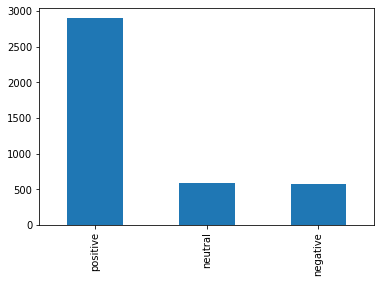

In [ ]:
pd.value_counts(df['Sentiment']).plot.bar()

In [ ]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


In [ ]:
#separate column category and add value to it
category = pd.get_dummies(df.Sentiment)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='Sentiment')
df_new

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,good product trusted seller,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


## Peprocess Dataset

In [ ]:
#remove repeated char
# continously repeating character
# from the word 
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df_new['Review'] = df_new['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df_new

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


In [ ]:
print(df_new.shape)
#Removes duplicates in place
df_new.drop_duplicates(keep=False, inplace=True)
print(df_new.shape) 
df_new

(4060, 5)
(3979, 5)


,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


## change data type

In [ ]:
#get label of dataset
content = df_new['Review'].values
label = df_new[['negative', 'neutral', 'positive']].values

## Build Train and test sets

In [ ]:
content_train, content_test, label_train, label_test = train_test_split(content, label, test_size=0.2)

## Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(content_train) 
 
sekuens_train = tokenizer.texts_to_sequences(content_train)
sekuens_test = tokenizer.texts_to_sequences(content_test)
 
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=20) 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)

## Build Model

In [ ]:
#build model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=8),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Callback

In [ ]:
#to stop train while acuracy greather than 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9):
      print("\nAccuracy and val accuracy has reach >90%!")
      self.model.stop_training = True
callbacks = myCallback()

## Train

In [ ]:
num_epochs = 50
history = model.fit(padded_train, label_train, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=1)

Epoch 1/50
100/100 [==============================] - 4s 19ms/step - loss: 0.9159 - accuracy: 0.6745 - val_loss: 0.6924 - val_accuracy: 0.7148
Epoch 2/50
100/100 [==============================] - 1s 14ms/step - loss: 0.5621 - accuracy: 0.7611 - val_loss: 0.5492 - val_accuracy: 0.7814
Epoch 3/50
100/100 [==============================] - 1s 14ms/step - loss: 0.3950 - accuracy: 0.8255 - val_loss: 0.5558 - val_accuracy: 0.7940
Epoch 4/50
100/100 [==============================] - 1s 14ms/step - loss: 0.3029 - accuracy: 0.8925 - val_loss: 0.5995 - val_accuracy: 0.7802
Epoch 5/50
100/100 [==============================] - 1s 14ms/step - loss: 0.2443 - accuracy: 0.9122 - val_loss: 0.7708 - val_accuracy: 0.7412
Epoch 6/50
100/100 [==============================] - 1s 14ms/step - loss: 0.2340 - accuracy: 0.9104 - val_loss: 0.6816 - val_accuracy: 0.7575
Epoch 7/50
100/100 [==============================] - 1s 13ms/step - loss: 0.1881 - accuracy: 0.9375 - val_loss: 0.7866 - val_accuracy: 0.7437

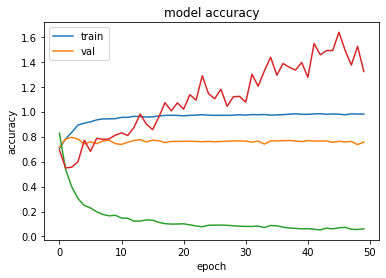

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Building model with LSTM

## Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv

--2021-05-11 12:40:35--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.03s   

2021-05-11 12:40:35 (8.68 MB/s) - ‘dataset_review_tokped_labelled.csv’ saved [294589/294589]



In [ ]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

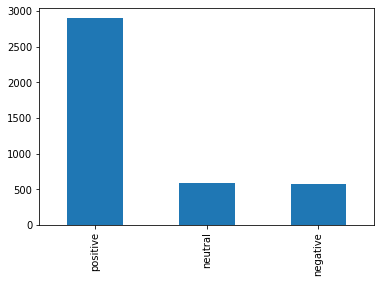

In [ ]:
pd.value_counts(df['Sentiment']).plot.bar()

In [ ]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


In [ ]:
#separate column category and add value to it
category = pd.get_dummies(df.Sentiment)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='Sentiment')
df_new

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,good product trusted seller,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


## Peprocess Dataset

In [ ]:
#remove repeated char
# continously repeating character
# from the word 
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df_new['Review'] = df_new['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df_new

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


In [ ]:
print(df_new.shape)
#Removes duplicates in place
df_new.drop_duplicates(keep=False, inplace=True)
print(df_new.shape) 
df_new

(4060, 5)
(3979, 5)


,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


## change data type

In [ ]:
#get label of dataset
content = df_new['Review'].values
label = df_new[['negative', 'neutral', 'positive']].values

## Build Train and test sets

In [ ]:
content_train, content_test, label_train, label_test = train_test_split(content, label, test_size=0.2)

## Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(content_train) 
 
sekuens_train = tokenizer.texts_to_sequences(content_train)
sekuens_test = tokenizer.texts_to_sequences(content_test)
 
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=20) 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)

## Build Model

In [ ]:
#build model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=8),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Callback

In [ ]:
#to stop train while acuracy greather than 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9):
      print("\nAccuracy and val accuracy has reach >90%!")
      self.model.stop_training = True
callbacks = myCallback()

## Train

In [ ]:
num_epochs = 50
history = model.fit(padded_train, label_train, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=1)

Epoch 1/50
100/100 [==============================] - 4s 19ms/step - loss: 0.9159 - accuracy: 0.6745 - val_loss: 0.6924 - val_accuracy: 0.7148
Epoch 2/50
100/100 [==============================] - 1s 14ms/step - loss: 0.5621 - accuracy: 0.7611 - val_loss: 0.5492 - val_accuracy: 0.7814
Epoch 3/50
100/100 [==============================] - 1s 14ms/step - loss: 0.3950 - accuracy: 0.8255 - val_loss: 0.5558 - val_accuracy: 0.7940
Epoch 4/50
100/100 [==============================] - 1s 14ms/step - loss: 0.3029 - accuracy: 0.8925 - val_loss: 0.5995 - val_accuracy: 0.7802
Epoch 5/50
100/100 [==============================] - 1s 14ms/step - loss: 0.2443 - accuracy: 0.9122 - val_loss: 0.7708 - val_accuracy: 0.7412
Epoch 6/50
100/100 [==============================] - 1s 14ms/step - loss: 0.2340 - accuracy: 0.9104 - val_loss: 0.6816 - val_accuracy: 0.7575
Epoch 7/50
100/100 [==============================] - 1s 13ms/step - loss: 0.1881 - accuracy: 0.9375 - val_loss: 0.7866 - val_accuracy: 0.7437

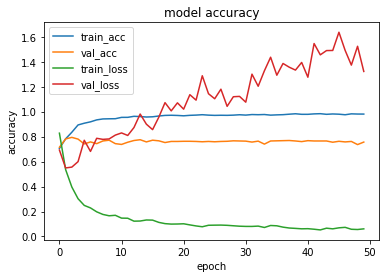

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss','val_loss'], loc='upper left')
plt.show()